In [49]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse


In [50]:
pkl_file_path = './part3_dataset/colors.pkl'

with open(pkl_file_path, 'rb') as pkl_file:
    dataset = pickle.load(pkl_file)

print(type(dataset))

<class 'numpy.ndarray'>


In [51]:
n = 7
gmm = GaussianMixture(n_components=n, random_state=0)
gmm.fit(dataset)

weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_


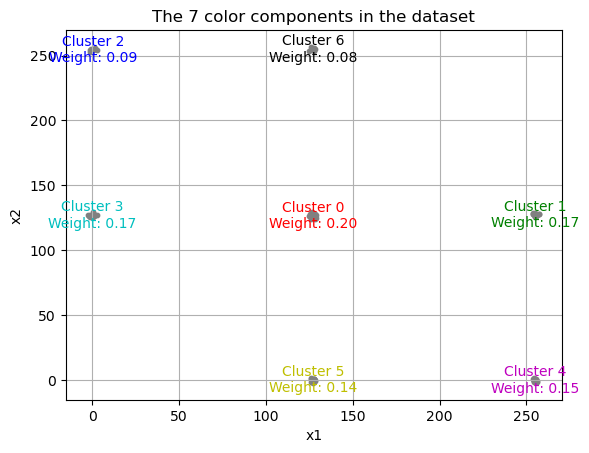

In [60]:
plt.scatter(dataset[:, 0], dataset[:, 1], s=10, c='grey', label='Data')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n):
    plt.text(
        means[i, 0],
        means[i, 1],
        f'Cluster {i}\nWeight: {weights[i]:.2f}',
        color=colors[i],
        fontsize=10,
        ha='center',
        va='center'
    )

plt.title('The 7 color components in the dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


In [61]:
def generateDataset(n, means, covariances, num_samples_per_component=100):

    X = []

    for i in range(n):
        num_samples = int(num_samples_per_component)
        
        samples = np.random.multivariate_normal(means[i], covariances[i], num_samples)
        X.append(samples)

    X = np.vstack(X)

    for i in range(n):
        plt.scatter(X[i * num_samples:(i + 1) * num_samples, 0],
                    X[i * num_samples:(i + 1) * num_samples, 1],
                    label=f'Cluster {i + 1}',marker='.')
        plt.text(
        means[i, 0],
        means[i, 1],
        f'Cluster {i}\nWeight: {weights[i]:.2f}',
        fontsize=10,
        ha='center',
        va='center'
    )


    plt.title('Sample dataset generated')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

    return X


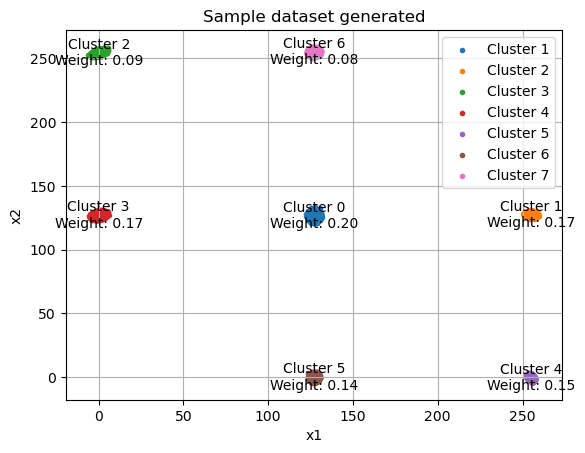

In [62]:
ret = generateDataset(7,means,covariances,100000)

Observations : 
- We can see that the newly generated dataset is very similar to the original dataset.

- The cluster assignment is properly done 
- We can infer from here that GMM can also be used as a Generative Model
- This intuition is clear from the fact that we can always view GMM in a generative way (as taught in class)
